<a href="https://colab.research.google.com/github/yaya1721/ML-spring22/blob/main/ML_assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 6
Dania Herzalla dh2741 <br>
Long Phan lvp243 <br>
Sonya Hsieh yh3529 <br>


## Problem 1
RNN for sentiment analysis, using data from IMDB

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN,\
     LSTM, GRU, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

top_words = 5000
max_review_length = 500
embedding_vector_length = 32

(X_train, y_train), (X_test, y_test)\
        = imdb.load_data(num_words=top_words)

X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print()
print('X_train shape:', X_train.shape, 'X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape, 'y_test shape', y_test.shape)

17473536/17464789 [==============================] - 0s 0us/step

X_train shape: (25000, 500) X_test shape: (25000, 500)
y_train shape: (25000,) y_test shape (25000,)


In [ ]:
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10,\
                    batch_size=128, validation_split=0.2)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 162,113
Trainable params: 162,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 76s 471ms/step - loss: 0.5705 - acc: 0.6959 - val_loss: 0.4401 - val_acc: 0.8082
Epoch 2/10
157/157 [==============================] - 74s 469ms/step - loss: 0.3838 - acc: 0.8388 - val_loss: 0.3958 - val_acc: 0.8264
Epoch 3/10
157/157 [=====================

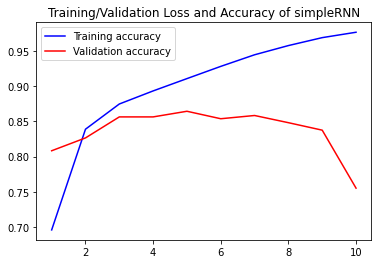

782/782 [==============================] - 29s 38ms/step - loss: 0.7142 - acc: 0.7500
Test loss: 0.7141894698143005 / Test accuracy: 0.75


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title("Training/Validation Loss and Accuracy of simpleRNN")
plt.legend()
plt.show()

score = model.evaluate(X_test, y_test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')




**Part 1** <br>
Embeddings allow us to present words within a context in a dense representation vector of float values, which can result in similar vectors (i.e. similar endodings) for words with similar contexts -> meanings). The vector values and the value for the word embedding are determined through adjustable weights determined through training. 

**Part 2** 


*   The output of the Embedding layer is a 3D tensor (batch, input_length, largest integer(word index))
*   Keras SimpleRNN expects an input of 3D tensor (batch, num_timesteps, num_features).
*   Flatten() flattens the input, but it does not affect the batch size. If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1). 

According to the above information, Flatten layer is not required.  


**Part 3** <br>
Replace the SimpleRNN layer by an LSTM layer or a GRU
layer with the same number of units and retrain the model <br>

Both LSTM and GRU (see below) increase the validation accuracy of model by morethan 0.1 (from 0.75 to 0.86). LSTM has the best performance with the highest training and validation scores among the three and SimpleRNN (above) tends to overfit as epoch increases. 



**GRU**

In [ ]:
modelGRU = Sequential()
modelGRU.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
modelGRU.add(GRU(32))
modelGRU.add(Dense(1, activation='sigmoid'))
modelGRU.summary()

modelGRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
h2 = modelGRU.fit(X_train, y_train, epochs=10,\
                    batch_size=128, validation_split=0.2)



Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 166,369
Trainable params: 166,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 5s 23ms/step - loss: 0.5281 - acc: 0.7281 - val_loss: 0.3587 - val_acc: 0.8452
Epoch 2/10
157/157 [==============================] - 3s 21ms/step - loss: 0.3514 - acc: 0.8581 - val_loss: 0.3341 - val_acc: 0.8642
Epoch 3/10
157/157 [=========================

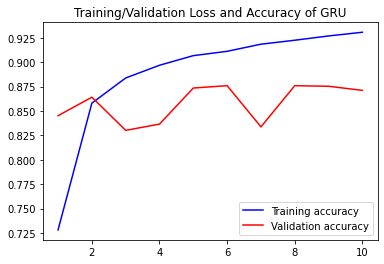

782/782 [==============================] - 7s 8ms/step - loss: 0.3303 - acc: 0.8659
Test loss: 0.3302737772464752 / Test accuracy: 0.865880012512207


In [ ]:
acc = h2.history['acc']
val_acc = h2.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title("Training/Validation Loss and Accuracy of GRU")
plt.legend()
plt.show()

score = modelGRU.evaluate(X_test, y_test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

**LSTM**

In [ ]:
modelLSTM = Sequential()
modelLSTM.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
modelLSTM.add(LSTM(32))
modelLSTM.add(Dense(1, activation='sigmoid'))
modelLSTM.summary()

modelLSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
h3 = modelLSTM.fit(X_train, y_train, epochs=10,\
                    batch_size=128, validation_split=0.2)



Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_48 (LSTM)              (None, 32)                8320      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 5s 24ms/step - loss: 0.5470 - acc: 0.7408 - val_loss: 0.4483 - val_acc: 0.7894
Epoch 2/10
157/157 [==============================] - 4s 23ms/step - loss: 0.3423 - acc: 0.8612 - val_loss: 0.3247 - val_acc: 0.8616
Epoch 3/10
157/157 [=========================

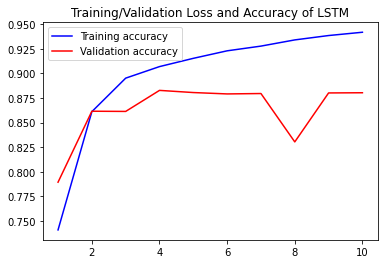

782/782 [==============================] - 7s 9ms/step - loss: 0.3317 - acc: 0.8749
Test loss: 0.3316880166530609 / Test accuracy: 0.8749200105667114


In [ ]:
acc = h3.history['acc']
val_acc = h3.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.title("Training/Validation Loss and Accuracy of LSTM")
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.legend()
plt.show()

score = modelLSTM.evaluate(X_test, y_test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

## Problem 2

 Learning the output of a sequence of numbers

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

In [ ]:
p = 7 #mod
n = 10000
inputs = []
outputs = []

def f(x,y):
  return (x-y)%p

for i in range(n):
  x = np.random.randint(0, p)
  y = np.random.randint(0, p)
  inputs.append([x,y])
  outputs.append([f(x,y)])

In [ ]:
X = np.reshape(inputs, (len(inputs), len(inputs[0]), 1))
X = X/p # normalize
y = np_utils.to_categorical(outputs)

model = Sequential()
# Note: all LSTM layers except the last must have 'return_sequences=True'
model.add(LSTM(64, input_shape=(X.shape[1], 1), return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16)) # number of neurons, memory unit
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

history = model.fit(X, y, epochs=20, batch_size=64,\
                    verbose=2, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 2, 64)             16896     
                                                                 
 lstm_4 (LSTM)               (None, 2, 32)             12416     
                                                                 
 lstm_5 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 7)                 119       
                                                                 
Total params: 32,567
Trainable params: 32,567
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
125/125 - 7s - loss: 1.9460 - acc: 0.14

**Part 1** <br>
Given a sequence of integers (length of at most 5), outputs (x0−x1+x2−· · ·+ (−1)^(k−1)*x_(k−1)) mod p

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

In [ ]:
p = 7
n = 10000
inputs = []
outputs = []

def f(a, b, c, d, e):
  return (a-b+c-d+e)%p

for i in range(n):
  a = np.random.randint(0, p)
  b = np.random.randint(0, p)
  c = np.random.randint(0, p)
  d = np.random.randint(0, p)
  e = np.random.randint(0, p)
  inputs.append([a, b, c, d, e])
  outputs.append([f(a, b, c, d, e)])

In [ ]:
X = np.reshape(inputs, (len(inputs), len(inputs[0]), 1))
X = X/p # normalize
y = np_utils.to_categorical(outputs) #one-hot encoding

# should play around to improve underfitting
model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1], 1), activation="relu", return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(16)) 
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

H = model.fit(X, y, epochs=30, batch_size=128,\
                    verbose=2, validation_split=0.2)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 5, 128)            66560     
                                                                 
 lstm_40 (LSTM)              (None, 5, 64)             49408     
                                                                 
 lstm_41 (LSTM)              (None, 16)                5184      
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 7)                 119       
                                                                 
Total params: 121,271
Trainable params: 121,271
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
63/63 - 6s - loss: 1.9459 - acc: 0.1

**Part 2-1** <br>
texts: https://www.gutenberg.org/files/1661/1661-0.txt <br>
code refering to: https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Embedding, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

In [ ]:
import os
from google.colab import files
# we only include texts between *** START OF THIS PROJECT *** and *** THE END ***
filename = files.upload() # gutenberg.txt

Saving gutenberg.txt to gutenberg.txt


In [ ]:
# load ascii text and covert to lowercase
raw_text = open('gutenberg.txt', 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

print(char_to_int)

n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab) #62 distinct characters in the vocabulary

{'\n': 0, ' ': 1, '!': 2, '&': 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, '0': 9, '1': 10, '2': 11, '3': 12, '4': 13, '5': 14, '6': 15, '7': 16, '8': 17, '9': 18, ':': 19, ';': 20, '?': 21, '_': 22, 'a': 23, 'b': 24, 'c': 25, 'd': 26, 'e': 27, 'f': 28, 'g': 29, 'h': 30, 'i': 31, 'j': 32, 'k': 33, 'l': 34, 'm': 35, 'n': 36, 'o': 37, 'p': 38, 'q': 39, 'r': 40, 's': 41, 't': 42, 'u': 43, 'v': 44, 'w': 45, 'x': 46, 'y': 47, 'z': 48, '£': 49, '½': 50, 'à': 51, 'â': 52, 'æ': 53, 'è': 54, 'é': 55, 'œ': 56, '—': 57, '‘': 58, '’': 59, '“': 60, '”': 61}
Total Characters:  562208
Total Vocab:  62


In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

# excluding the last 100 characters
# one training pattern to predict each of the remaining characters.

Total Patterns:  562108


In [ ]:
# reshape X to be [samples, time steps, features] expected by LSTM network
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X/float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [ ]:
# define and train the LSTM model
# The CUDNN LSTM acceleration only works if the activation is tanh
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
#model.add(Bidirectional(LSTM(64))) too slow to see the result
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()
H = model.fit(X, y, epochs=30, batch_size=128, verbose=2, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 62)                15934     
                                                                 
Total params: 280,126
Trainable params: 280,126
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
3514/3514 - 132s - loss: 2.8689 - acc: 0.2031 - val_loss: 2.7232 - val_acc: 0.2344 - 132s/epoch - 37ms/step
Epoch 2/30
3514/3514 - 131s - loss: 2.6994 - acc: 0.2405 - val_loss: 2.6300 - val_acc: 0.2511 - 131s/epoch - 37ms/step
Epoch 3/30
3514/3514 - 138s - loss: 2.6092 - acc: 0.2599 - val_loss: 2.529

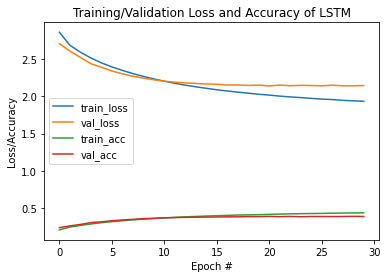

In [ ]:
plt.figure()
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot(H.history["acc"], label="train_acc")
plt.plot(H.history["val_acc"], label="val_acc")
plt.title("Training/Validation Loss and Accuracy of LSTM")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

**Part 2-2** <br>
Use the trained model to generate text as follows <br>
Note: the model is underfitting

In [ ]:
# create a reverse mapping
import sys
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# pick a random seed sequence
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(1000):
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\n\nGenerating Texts Done.")

Seed:
" rd, came out of the room and closed the door tightly behind him.

“i’ve got him here,” he whispered, "
 “i shall see the serert of the same toeer that toee to tee hor to the sore. i shall be a saare of toeee in the same toeer the semelts bnoe that ie wou wal soeee to be in the sace in the same toeer that ie it iad seee an anseoution oo the same aod the saale of the same aos of the same coering oo the same ald the sooe that the same had been seened to hev that the same had been seened to hev that the same had been seened to hev that the same had been so besieie tha some to ae a saate and tooe tearen of the same coorenion of the same aod a saale of the same clarer of the semelts of the same ald the sooe that the same had been seened to hev that the same had been seened to hev that the same had been seened to hev that the same had been so besieie tha some to ae a saate and tooe tearen of the same coorenion of the same aod a saale of the same clarer of the semelts of the same ald t

## Problem 3

Given:
- 10000 strings of 4000 bits, where each 4 bits encodes a character (from A to Z + space)
- labels with the strings indicating whether they contain the substring or not
- we know the substring is always 3 letters

Based off the characters that occured in the past or in the future, this helps to predict the next char --> therefore we can consider using the transformer to predict the probability of obtaining a certain character instead of words.<br>

We need to learn a classifier that will predict whether a substring (a 12 bit sequence) exists in the string of 4000 bits.

We can use a tranformer in order to create a context dependent learning where the character portions of the string that contain the agency substring with highest probability before or after the occurance of certain chars can have the highest attention in the learning rather than moving through the string sequence in order of beginning to end and storing the long string sequences.

## Problem 4 & 5
finsiehd <br>
https://blog.keras.io/building-autoencoders-in-keras.html

## Problem 6

Each black pixel in the displayed image represents a 0 and each white pixel represents a 1. <br>
Design and train a model which takes such an array as input and outputs an estimate of the
radius of the circle. <br>
https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

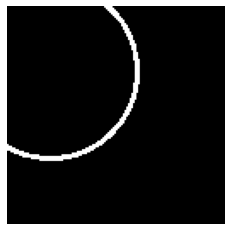

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
N = 128
def circle(x, y, r):
  x = int(x*N)
  y = int((1-y)*N)
  r = int(r*N)
  image = np.zeros(shape=[N, N], dtype=np.uint8) # image: on which circle is to be drawn
  cv2.circle(image, center=(x, y), radius=r, color=1, thickness=2)
  return image
plt.gca().set_axis_off()
image = circle(0.2, 0.7, 0.4) # return a N*N 
plt.imshow(image, cmap='gray')

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten, Embedding, SimpleRNN, GRU, Conv2D, MaxPooling2D
from keras import regularizers
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

In [ ]:
# define X and y
n = 10000 # number of images for training

inputs = [] # an array of N*N image
outputs = []

for i in range(n):
  Xx = np.random.random()
  Xy = np.random.random()
  r = np.random.random()
  inputs.append(np.array(circle(Xx, Xy, r)))
  outputs.append(int(r*N))

#X = np.array(inputs)
X = np.reshape(inputs, (len(inputs), len(inputs[0]), 128, 1)) # reshape to 3D
#plt.imshow(inputs[0], cmap='gray')
y = np_utils.to_categorical(outputs) #one-hot encoding
image_shape = (128,128,1)

In [ ]:
# define and train the CNN model
model = Sequential()
model.add(Conv2D(16, kernel_size = (1,1), strides=(1,1), activation="relu", input_shape=image_shape))
#model.add(Conv2D(32, kernel_size = (1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()
H = model.fit(X, y, epochs=10, batch_size=32, verbose=2, validation_split = 0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 16)      32        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 64, 64, 16)        0         
                                                                 
 flatten_2 (Flatten)         (None, 65536)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8388736   
                                                                 
Total params: 8,388,768
Trainable params: 8,388,768
Non-trainable params: 0
____________________________________________

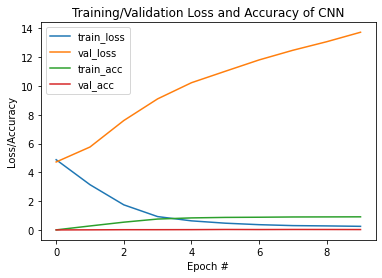

In [ ]:
plt.figure()
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot(H.history["acc"], label="train_acc")
plt.plot(H.history["val_acc"], label="val_acc")
plt.title("Training/Validation Loss and Accuracy of CNN")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()